In [ ]:
#import all modules 
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#reading the data
df = pd.read_csv('/content/Resume_Dataset.csv')
df
resume = df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [ ]:
print ("Resume Categories")
print (df['Category'].value_counts())

Resume Categories
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

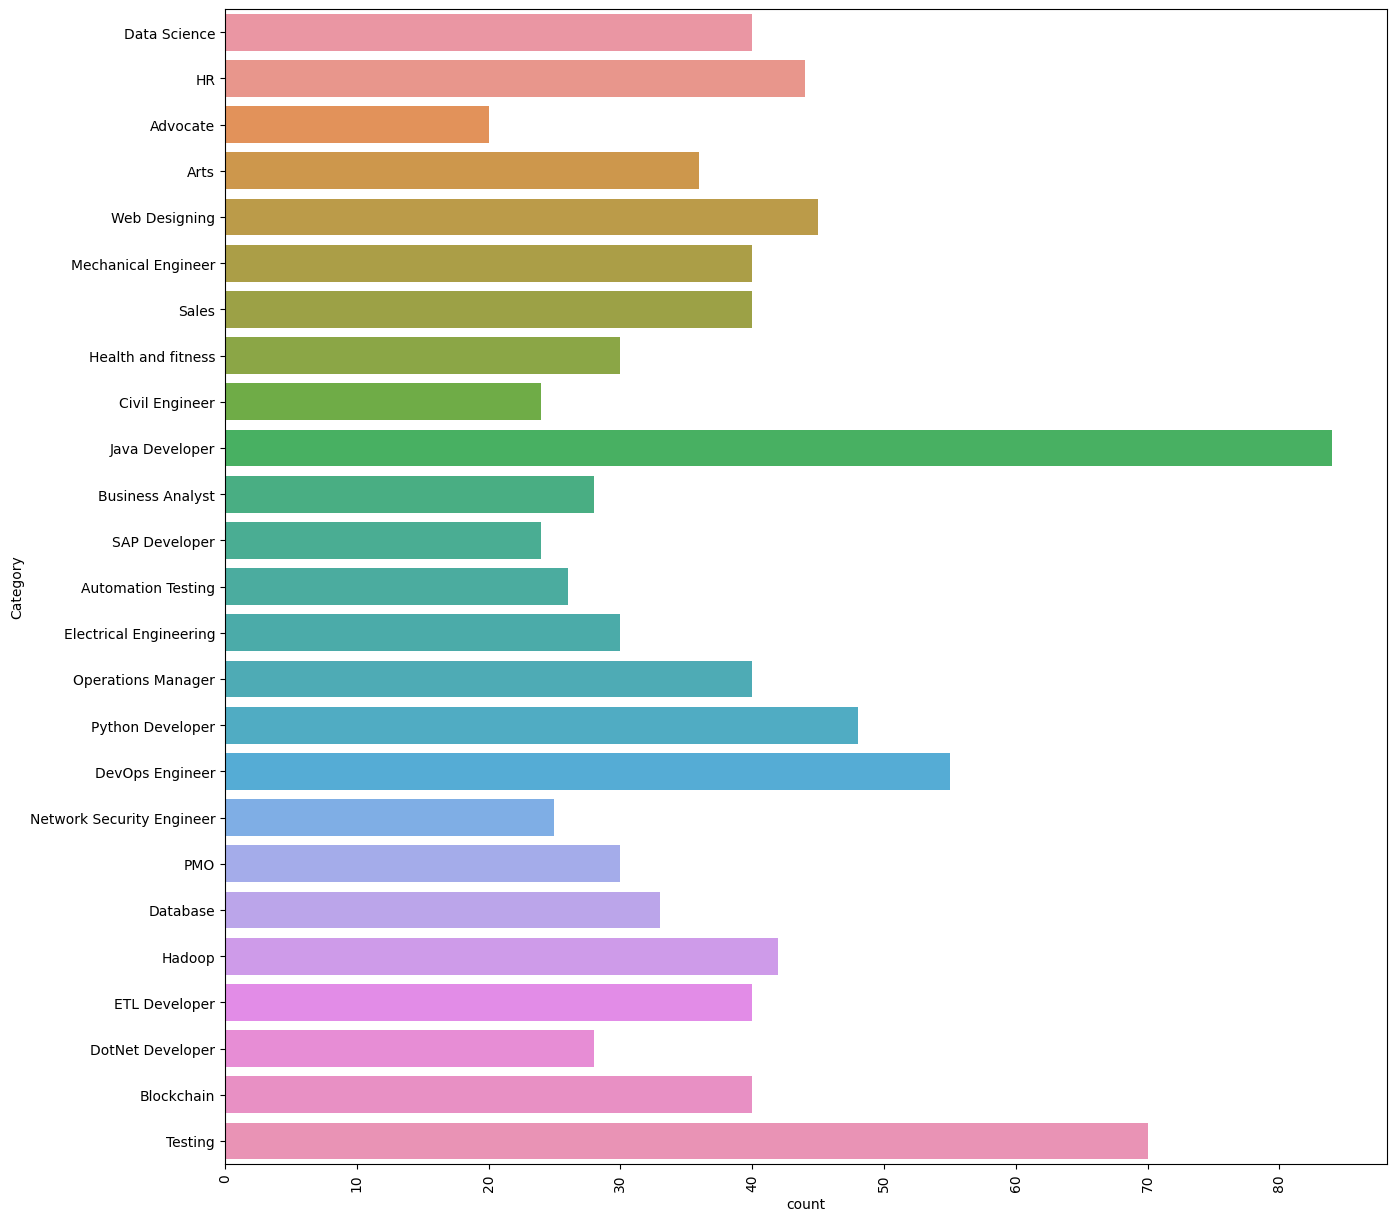

In [ ]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data = df)

In [ ]:
df["Resume"][2]

'Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics Engineering  Manipal Institute of Technology\r\nJanuary 2015    DEEKSHA CENTER\r\nJanuary 2013    Little Flower Public School\r\nAugust 2000    Manipal Academy of Higher\r\nDATA SCIENCE \r\n\r\nDATA SCIENCE AND ELECTRICAL ENTHUSIAST\r\nSkill Details \r\nData Analysis-

In [ ]:
df["Resume"][500]

'Education Details \r\nJanuary 2012 to January 2013 B.E. Electrical  Shivaji University\r\nSeptember 2008 HSC  Pune, Maharashtra Pune University\r\nJuly 2006 SSC  Pune, Maharashtra Pune University\r\nElectrical Engineer \r\n\r\nElectrical Engineer - R K ELECTRICAL PVT. LTD\r\nSkill Details \r\nCompany Details \r\ncompany - R K ELECTRICAL PVT. LTD\r\ndescription - Experience:- 1 Year 3 Months\r\n\r\nTroubleshooting and Maintenance of following Electrical Equipment:- â\x80¢ All Type of Maintenance of Utility.\r\nâ\x80¢ Electrical and Mechanical Maintenance.\r\nâ\x80¢ Two 625 KVA Diesel Generator Set (Kirloskar)\r\nâ\x80¢ HT/LT Switchgear With Protection System Using Relays and Provision For Interlocking (C&S, Kirloskar)\r\nâ\x80¢ Handling HT Vacuum & SF6 Circuit Breaker, Transformer Up to 5000 KVA, LT Air circuit Breaker  2000A\r\nâ\x80¢ Maintenance of STP and WTP Plant.\r\nâ\x80¢ Maintenance of Air Blower, Actuators, Soft Starter, EOT Crane, Mono Rail, Centrifugal or Vertical Pumps, Hyd

**Data Cleaning**

Now we have to clean the resume text


In [ ]:
import re
def cleanResume(resumeText):
  resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
  resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
  resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
  resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
  resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
  resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
  resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
  return resumeText

In [ ]:
df['Cleaned_Resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [ ]:
df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
len(df)

962

In [ ]:
#getting the entire resume text from the dataset

corpus = " "

for i in range(0,962):
  corpus = corpus+df["Cleaned_Resume"][i]

In [ ]:
corpus[1000:2500]

'review process and run analytics and generate reports Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain this tool implements predictive coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyers review Understand the end to end flow of the solution doing research and development for classification models predictive analysis and mining of the information present in text data Worked on analyzing the outputs and precision monitoring for the entire tool TAR assists in predictive coding topic modelling from the evidence by following EY standards Developed the classifier models in order to identify red flags and fraud related issues Tools Technologies Python scikit learn tfidf word2vec doc2vec cosine similarity Na ve Bayes LDA NMF for topic modelling Vader and text blob for sentiment analysis Matplot lib Tableau dashboard for reporting MULTIPLE DATA SCIENCE AND ANAL

In [ ]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

#Tokenizing the text
tokens = tokenizer.tokenize(corpus)

len(tokens)

411913

In [ ]:
#Conversion into Lowercase For Uniformity ,now we shall make everthing into lowercase
#to hold the new lower case words

words = []

#Running a For loop i.e looping through the tokens and make them lower case
for word in tokens:
  words.append(word.lower())

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#stop words are generally the most commaon words in a language.
#English stopwords are taken  from nltk.

stopwords = nltk.corpus.stopwords.words('english')

words_new = []

#Now we need to remove the Stop words from the words varaiable
#Appending to words_new all words taht are in words but not in stop words

for word in words:
  if word not in stopwords:
    words_new.append(word)



In [ ]:
len(words_new)

318305

**Lemmatization**

It is the process of grouping together the different inflected forms of a word so they can be analyzed into single term i.e so it links words with similar meaning into single word

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

wn = WordNetLemmatizer()

lem_words=[]
for word in words_new:
  words = wn.lemmatize(word)
  lem_words.append(words)

In [ ]:
len(lem_words) 
#print(lem_words)

318305

In [ ]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 294
Number of words not Lemmatized= 1538


Frequency distribution

In [ ]:
#To know the frequency Distribution of words
freq_dist = nltk.FreqDist(lem_words)

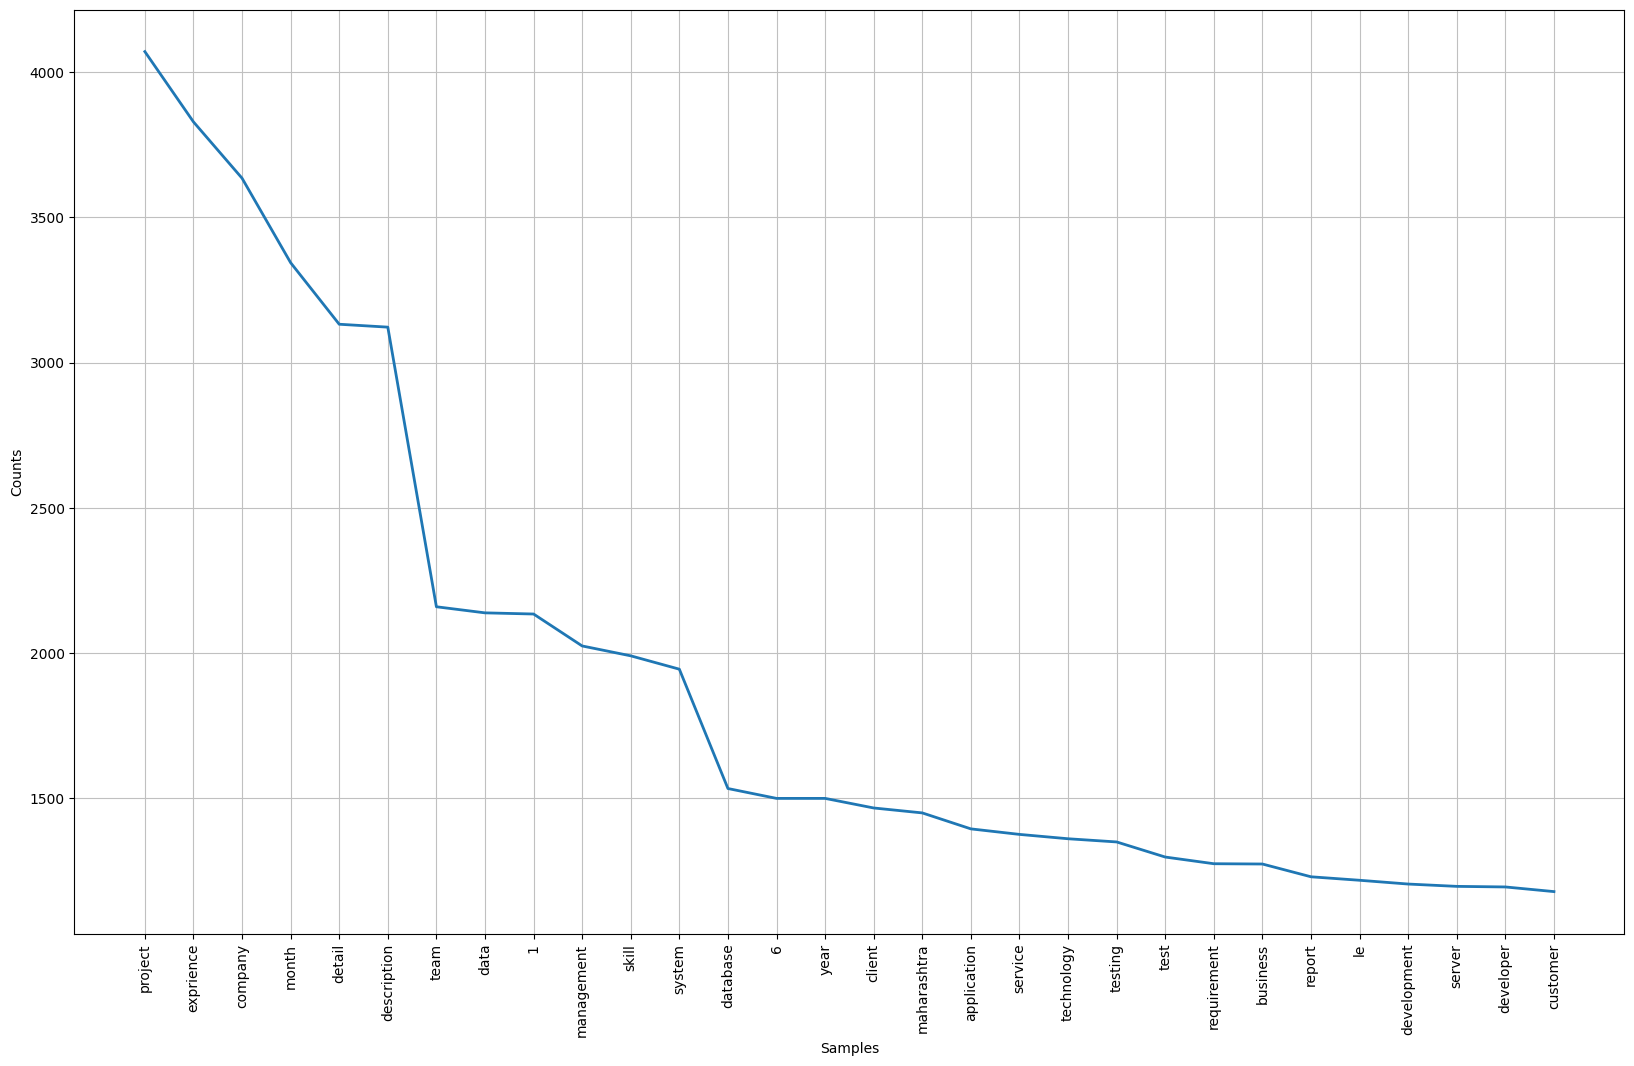

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#frequency Distribution plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [ ]:
len(freq_dist)

6769

In [ ]:
mostcommon = freq_dist.most_common(50)

In [ ]:
mostcommon

[('project', 4071),
 ('exprience', 3829),
 ('company', 3635),
 ('month', 3344),
 ('detail', 3132),
 ('description', 3122),
 ('team', 2159),
 ('data', 2138),
 ('1', 2134),
 ('management', 2024),
 ('skill', 1990),
 ('system', 1944),
 ('database', 1533),
 ('6', 1499),
 ('year', 1499),
 ('client', 1466),
 ('maharashtra', 1449),
 ('application', 1394),
 ('service', 1375),
 ('technology', 1360),
 ('testing', 1349),
 ('test', 1297),
 ('requirement', 1274),
 ('business', 1273),
 ('report', 1229),
 ('le', 1217),
 ('development', 1204),
 ('server', 1196),
 ('developer', 1194),
 ('customer', 1178),
 ('ltd', 1177),
 ('process', 1163),
 ('responsibility', 1137),
 ('using', 1124),
 ('sql', 1120),
 ('january', 1090),
 ('java', 1076),
 ('engineering', 1055),
 ('work', 1038),
 ('pune', 1026),
 ('role', 969),
 ('c', 951),
 ('user', 916),
 ('operation', 895),
 ('software', 886),
 ('pvt', 879),
 ('sale', 845),
 ('activity', 832),
 ('environment', 800),
 ('design', 786)]

WordCloud

Category Anylsis

In [ ]:
data_science=df[df["Category"]=="Data Science"]

In [ ]:
data_science.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
len(data_science)

40

In [ ]:
#Getting the Entire resume text

data_science_corpus= " "

for i in range(0,40):
  data_science_corpus = data_science_corpus+data_science["Cleaned_Resume"][i]

In [ ]:
data_science_corpus=data_science_corpus.lower()

In [ ]:
words_data_science = data_science_corpus.split()

In [ ]:
print('Frequency of "python" is :', words_data_science.count("python"))

Frequency of "python" is : 176


In [ ]:
print('Frequency of "sap" is :', words_data_science.count("sap"))

Frequency of "sap" is : 68


In [ ]:
print('Frequency of "analysis" is :', words_data_science.count("analysis"))

Frequency of "analysis" is : 84


In [ ]:
print('Frequency of "sql" is :', words_data_science.count("sql"))

Frequency of "sql" is : 72


In [ ]:
print('Frequency of "neural" is :', words_data_science.count("neural"))

Frequency of "neural" is : 48


In [ ]:
print('Frequency of "network" is :', words_data_science.count("network"))

Frequency of "network" is : 12


In [ ]:
print('Frequency of "networks" is :', words_data_science.count("networks"))

Frequency of "networks" is : 20


In [ ]:
print('Frequency of "pandas" is :', words_data_science.count("pandas"))

Frequency of "pandas" is : 24


In [ ]:
print('Frequency of "r" is :', words_data_science.count("r"))

Frequency of "r" is : 36


In [ ]:
print('Frequency of "excel" is :', words_data_science.count("excel"))

Frequency of "excel" is : 12


In [ ]:
print('Frequency of "anaconda" is :', words_data_science.count("anaconda"))

Frequency of "anaconda" is : 4


In [ ]:
print('Frequency of "education" is :', words_data_science.count("education"))

Frequency of "education" is : 48


In [ ]:
print('Frequency of "jupyter" is :', words_data_science.count("jupyter"))

Frequency of "jupyter" is : 4


In [ ]:
print('Frequency of "experience" is :', words_data_science.count("experience"))

Frequency of "experience" is : 52
